In [7]:
from database import *

In [8]:
def ticks_to_kbars(ticks, interval='1Min'):

    kbars = pd.DataFrame()
    
    kbars['open'] = ticks['close'].resample(interval).first()
    kbars['close'] = ticks['close'].resample(interval).last()
    kbars['high'] = ticks['close'].resample(interval).max()
    kbars['low'] = ticks['close'].resample(interval).min()
    kbars['volume'] = ticks['volume'].resample(interval).sum()
    
    kbars.dropna(inplace=True)
    
    return kbars

In [19]:
api = sj.Shioaji()
api.login(
    person_id="N123569782",
    passwd="hons3146",
    contracts_cb=lambda security_type: print(f"{repr(security_type)} fetch done."))

# api.logout()

connection = sqlite3.connect('data.db')

Response Code: 0 | Event Code: 0 | Info: host '203.66.91.161:80', hostname '203.66.91.161:80' IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total connection attempt 1 of 1) | Event: Session up
<SecurityType.Index: 'IND'> fetch done.
<SecurityType.Future: 'FUT'> fetch done.


In [20]:
code = '2441'
date = pd.to_datetime('2021/6/16')

ticks = get_ticks(code, date, connection, api)[0]
ticks

<SecurityType.Stock: 'STK'> fetch done.
<SecurityType.Option: 'OPT'> fetch done.


,bid_price,ask_price,ask_volume,volume,close,bid_volume,code
ts,,,,,,,
2021-06-16 09:00:04.004759,74.1,74.2,4,29,74.2,1,2441
2021-06-16 09:00:04.267998,74.0,74.2,4,1,74.1,2,2441
2021-06-16 09:00:10.383336,73.9,74.2,8,2,74.0,7,2441
2021-06-16 09:00:14.075408,73.9,74.2,6,1,73.9,6,2441
2021-06-16 09:00:24.812331,73.9,74.1,1,1,74.1,7,2441
...,...,...,...,...,...,...,...
2021-06-16 13:24:55.212091,73.9,74.1,65,1,74.1,9,2441
2021-06-16 13:24:55.213841,73.9,74.1,61,1,74.1,6,2441
2021-06-16 13:24:58.695390,73.9,74.1,61,1,73.9,5,2441


In [21]:
kbars = ticks_to_kbars(ticks)
kbars

,open,close,high,low,volume
ts,,,,,
2021-06-16 09:00:00,74.2,74.1,74.2,73.9,34
2021-06-16 09:01:00,74.1,74.1,74.1,74.1,12
2021-06-16 09:02:00,74.0,74.4,74.4,74.0,24
2021-06-16 09:03:00,74.4,74.4,74.5,74.3,12
2021-06-16 09:04:00,74.4,74.5,74.5,74.4,47
...,...,...,...,...,...
2021-06-16 13:22:00,74.0,74.0,74.0,73.9,14
2021-06-16 13:23:00,74.0,74.1,74.1,73.9,12
2021-06-16 13:24:00,74.1,73.9,74.1,73.9,25


In [22]:
kbars = ticks_to_kbars(ticks, interval='5Min')
kbars

,open,close,high,low,volume
ts,,,,,
2021-06-16 09:00:00,74.2,74.5,74.5,73.9,129
2021-06-16 09:05:00,74.4,74.1,74.4,74.1,80
2021-06-16 09:10:00,74.0,74.1,74.2,74.0,24
2021-06-16 09:15:00,74.1,74.1,74.1,74.0,47
2021-06-16 09:20:00,74.1,74.1,74.2,74.1,23
2021-06-16 09:25:00,74.1,74.1,74.2,74.1,43
2021-06-16 09:30:00,74.1,74.1,74.1,74.1,31
2021-06-16 09:35:00,74.0,73.9,74.1,73.9,58
2021-06-16 09:40:00,73.9,73.8,73.9,73.8,29


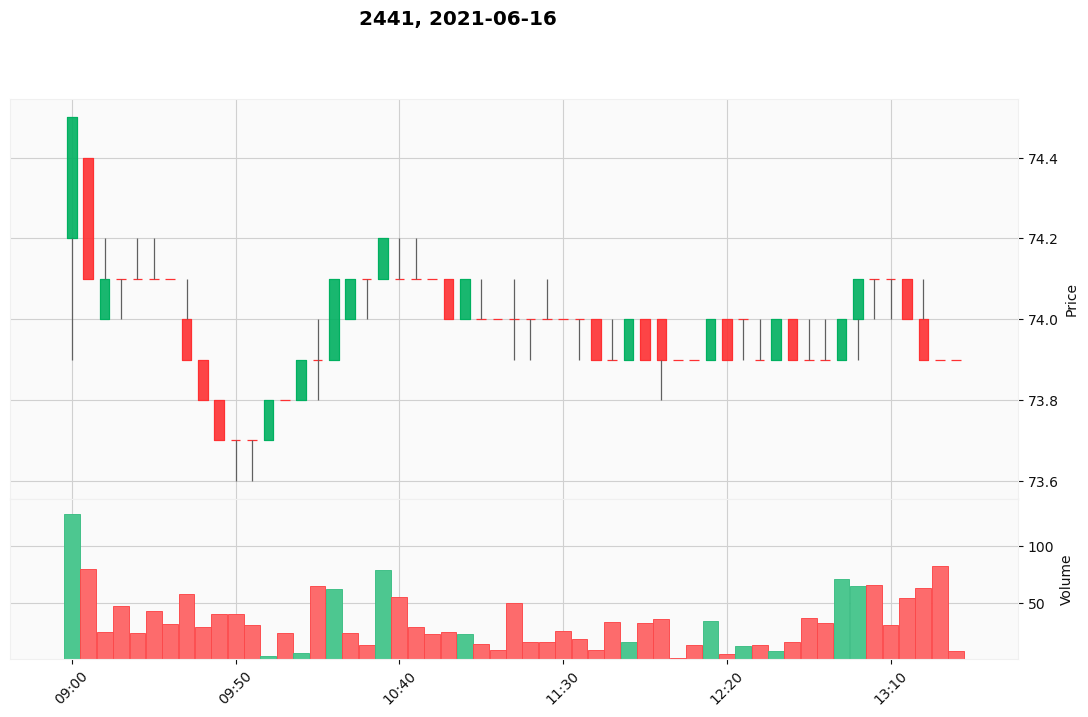

In [24]:
import mplfinance as mpf

mpf.plot(kbars,
         title='{}, {}'.format(code, date.date()),
         type='candle',
         style='yahoo',
         volume=True,
         figsize=(14, 8)
        )

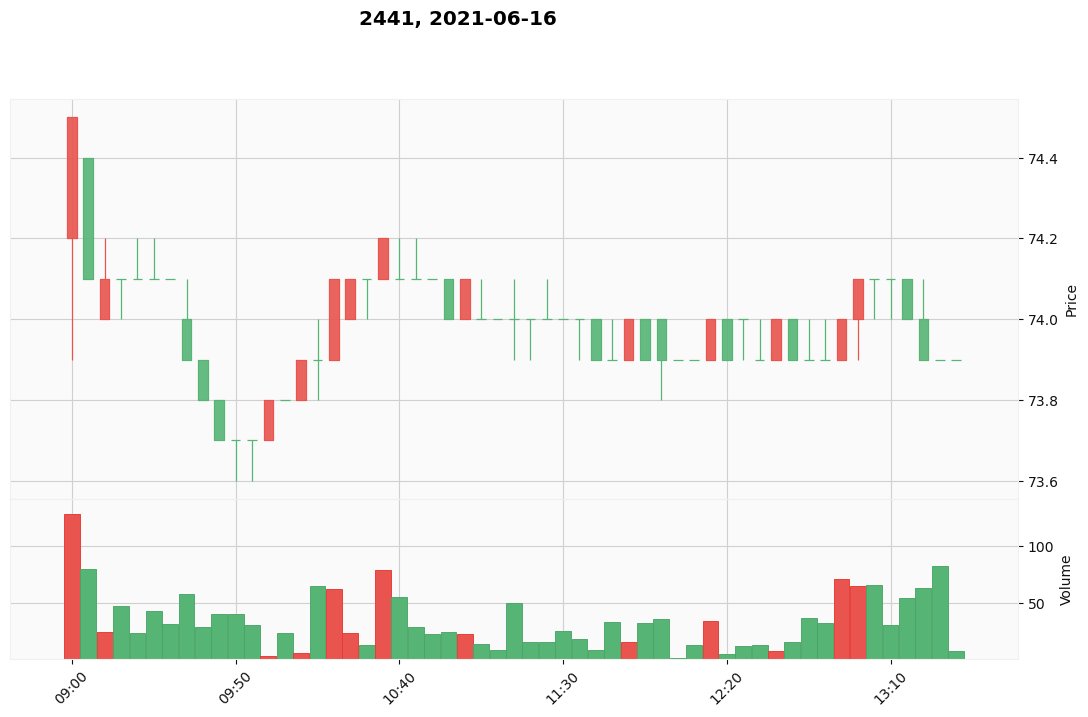

In [25]:
marketcolors = mpf.make_marketcolors(up='#E9544E',down='#56B475', inherit=True)
style = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=marketcolors)

mpf.plot(kbars, 
         title='{}, {}'.format(code, date.date()),
         type='candle',
         style=style,
         volume=True,
         figsize=(14, 8)
        )